In [168]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

In [18]:
def calculate_fitness(agent):
    return np.sum(100-(np.abs(agent-7)))

In [411]:
def calculate_fitness_array(agents):
    fitnesses = np.array([calculate_fitness(agent) for agent in agents])
    return fitnesses

def calculate_reproduction_chance(agents, epoch=1, value_uniqueness = True):
    fitnesses = calculate_fitness_array(agents)
    fitnesses = (fitnesses-np.mean(fitnesses))/np.std(fitnesses)
    
    if value_uniqueness:
        gene_uniqueness = np.array([distance(np.mean(agents, axis=1), agent) for agent in agents])
        gene_uniqueness = (gene_uniqueness-np.mean(agents))/np.std(gene_uniqueness)

        reproduction_chance = fitnesses + (gene_uniqueness * np.sin(2*epoch*np.pi/200))
        reproduction_chance = (reproduction_chance-np.mean(reproduction_chance))/np.std(reproduction_chance)

        return reproduction_chance+2
    
    return fitnesses+2

def distance(x1, x2):
    return np.linalg.norm(x1-x2)

def mutate_agent(agent, rate, bounds):
    mutations = np.random.uniform(0,1/rate, size=agent.shape)
    mutations[mutations>1] = 0
    
    agent[mutations!=0] += np.random.normal(0, (bounds[1]-bounds[0]) ** 0.4, mutations[mutations!=0].shape).astype(np.int32)
    agent[agent<bounds[0]] = bounds[0]
    agent[agent>bounds[1]] = bounds[1]
    
    return agent

def mutate_array(agents, rate, bounds):
    mutated_agents = np.array([mutate_agent(agent, rate, bounds) for agent in agents])
    return mutated_agents

def mutate_array(agents, rate, bounds):
    mutated_agents = np.array([mutate_agent(agent, rate, bounds) for agent in agents])
    return mutated_agents

def merge_genes(a, b, n_genes):
    merged = np.zeros(shape=(n_genes, int(a.shape[0]/n_genes)))
    
    genes_a = a.reshape(n_genes, int(a.shape[0]/n_genes))
    genes_b = b.reshape(n_genes, int(b.shape[0]/n_genes))
    to_merge = np.random.randint(0,2, size=(n_genes))

    merged[to_merge == 0] = genes_a[to_merge == 0]
    merged[to_merge == 1] = genes_b[to_merge == 1]
    
    return merged.reshape(-1)

def genes_to_rgb(agent):
    RGB_driver = agent.reshape(8, 3, int(agent.shape[0]/24))
    image_pixels = np.zeros(shape=(1, int(agent.shape[0]/24), 3))
    for i, pixel in enumerate(RGB_driver):
        for j, channel in enumerate(pixel):
            image_pixels[0][i][j] = channel.dot(2**np.arange(channel.size)[::-1])
    return image_pixels.astype(int)

def show_n_agents(agents, n):
    fig, ax = plt.subplots(round(n/8),8,figsize=(12,6))
    img = []
    indices = np.random.randint(0,agents.shape[0], size=(n))
    for i, index in enumerate(indices):
        ax[i].imshow(agents[index].reshape(10,10), cmap='plasma', vmin=agent_bounds[0], vmax=agent_bounds[1])
        ax[i].axis('off')
        
def calculate_entropy(agents):
    entropy = np.zeros(agents.shape[1])
    for col in range(agents.shape[1]):
        unique, counts = np.unique(agents[:,col], return_counts=True)
        for i, count in enumerate(counts):
            entropy[col] += (count/np.sum(counts) * (np.sum(counts) - count)/np.sum(counts))
    return np.mean(entropy)

In [430]:
num_genes = 100 #Representable as 8 pixels of 255 RGB
num_agents = 100
num_generations = 1000
mutation_rate = 0.01
agent_bounds = (0,100) #Inclusive

In [431]:
current_generation = np.random.randint(agent_bounds[0], agent_bounds[1]+1, size=(num_agents, num_genes))
first_generation = np.copy(current_generation)
history = []
genetic_diversity = []

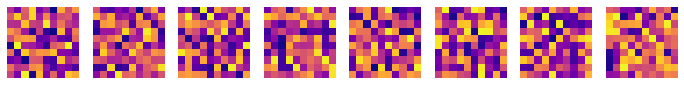

In [432]:
show_n_agents(current_generation, 8)

In [433]:
for i in range(num_generations):
    fitnesses = calculate_reproduction_chance(current_generation, epoch=i, value_uniqueness=True)
    gene_pool = np.array(random.choices(current_generation, weights = fitnesses, k=current_generation.shape[0]*2))

    next_generation = np.array([merge_genes(gene_pool[i], gene_pool[i+1], 10) for i in range(int(len(gene_pool)/2))])
    next_generation = mutate_array(next_generation, mutation_rate, agent_bounds)
                                   
    current_generation = next_generation
    history.append(np.mean([calculate_fitness(agent) for agent in current_generation])/num_genes)
    genetic_diversity.append(np.mean([distance(np.mean(current_generation, axis=1), agent) for agent in current_generation]))

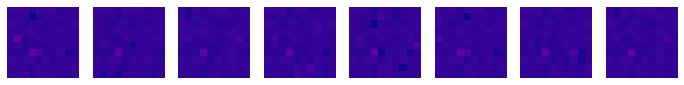

In [434]:
show_n_agents(current_generation, 8)
best = current_generation[np.argmax(calculate_reproduction_chance(current_generation, value_uniqueness=False))]

Final diversity score: 17.414197622514088


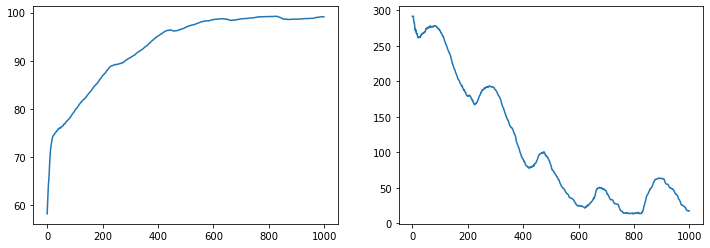

In [435]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(np.arange(0, len(history)), history)
ax[1].plot(np.arange(0, len(genetic_diversity)), genetic_diversity)
print(f'Final diversity score: {genetic_diversity[-1]}')

In [436]:
current_generation = np.random.randint(agent_bounds[0], agent_bounds[1]+1, size=(num_agents, num_genes))
first_generation = np.copy(current_generation)
history = []
genetic_diversity = []
for i in range(num_generations):
    fitnesses = calculate_reproduction_chance(current_generation, value_uniqueness = False)
    gene_pool = np.array(random.choices(current_generation, weights = fitnesses, k=current_generation.shape[0]*2))

    next_generation = np.array([merge_genes(gene_pool[i], gene_pool[i+1], 10) for i in range(int(len(gene_pool)/2))])
    next_generation = mutate_array(next_generation, mutation_rate, agent_bounds)
                                   
    current_generation = next_generation
    history.append(np.mean([calculate_fitness(agent) for agent in current_generation])/num_genes)
    genetic_diversity.append(np.mean([distance(np.mean(current_generation, axis=1), agent) for agent in current_generation]))

Final diversity score: 10.710809924664705


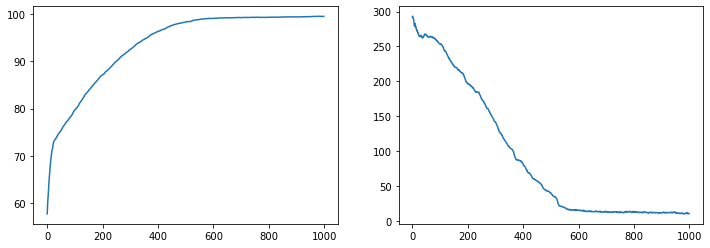

In [437]:
best2 = current_generation[np.argmax(calculate_reproduction_chance(current_generation, value_uniqueness=False))]
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(np.arange(0, len(history)), history)
ax[1].plot(np.arange(0, len(genetic_diversity)), genetic_diversity)
print(f'Final diversity score: {genetic_diversity[-1]}')

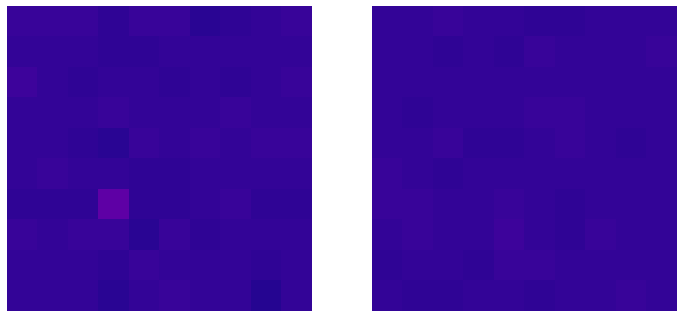

In [441]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(best.reshape(10,10), cmap='plasma', vmin=agent_bounds[0], vmax=agent_bounds[1])
ax[0].axis('off')
ax[1].imshow(best2.reshape(10,10), cmap='plasma', vmin=agent_bounds[0], vmax=agent_bounds[1])
ax[1].axis('off');